In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [3]:
# we need to have the model class for inference
class mnistEncoder(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.ae = nn.Sequential(
            nn.Linear(dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, dim)
        )

    def forward(self, x):
        return self.ae(x)


In [4]:
ae = mnistEncoder(28*28*1)

In [5]:
ae.load_state_dict(torch.load("trained.pth")) ##to load the model

<All keys matched successfully>

In [6]:
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3087,))]
)
dataset = datasets.MNIST(root='data/', download=True, transform=transforms)
loader = DataLoader(dataset, batch_size=5, shuffle=True)


In [7]:
x = next(iter(loader))[0]
print(x.shape) #5 digits

torch.Size([5, 1, 28, 28])


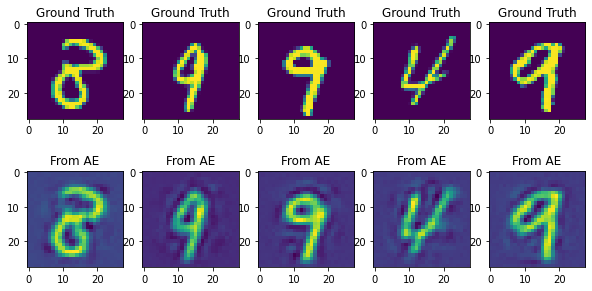

In [8]:
fig,axs = plt.subplots(2,5,figsize=(10,5))
plt.title("Ground-truth vs autoencoder")
for i in range(5):
    axs[0][i].imshow(x[i].view(28,28).detach().numpy())
    axs[0][i].set_title("Ground Truth")
    axs[1][i].imshow(ae(x[i].view(-1)).view(28,28).detach().numpy())
    axs[1][i].set_title("From AE")
#Trained for only 5 epochs in my machine ,hence we observe blur
   